In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import column_or_1d
from sklearn.metrics import confusion_matrix
import seaborn as sn

from format import format_poker_data

In [4]:
train_data = pd.read_csv('train.csv')

In [5]:
test_data = pd.read_csv('test.csv')

In [6]:
X_train, y_train = np.split(train_data,[-1],axis=1)

In [7]:
test_data = test_data.dropna()

In [8]:

X_test, y_test = np.split(test_data,[-1],axis=1)

In [9]:
X_train , equal_suit_train = format_poker_data(X_train)

In [10]:
X_test , equal_suit_test = format_poker_data(X_test)

In [11]:
pred = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [12]:
y_train = column_or_1d(y_train)
y_test = column_or_1d(y_test)

In [13]:
pred.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [14]:
pred.score(X_train,y_train)

0.9971611355457817

In [15]:
pred.score(X_test,y_test)

0.969817

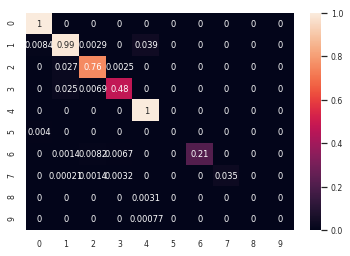

In [53]:
#Confusion Matrixfor Test Data
conf_array_test = confusion_matrix(y_test,pred.predict(X_test))
conf_array_test =  conf_array_test / conf_array_test.astype(np.float).sum(axis=1)
df_class_test = pd.DataFrame(conf_array_test, range(10),range(10))
sn.set(font_scale=0.7)#for label size
sn.heatmap(df_class_test,annot=True)# font size


In [19]:
%timeit -n1 pred.fit(X_train,y_train)

35.3 ms ± 4.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
